# Aircraft Dynamics and Control : Python Code Demonstration

This notebook is meant to demonstrate the use of various python scripts for application to aircraft dynamics and controls. Specifically, it will apply an object oriented / toolbox approach for modeling the flight, stability, and control options for a fixed-wing aircraft.

First, some essential python libraries:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.ion()

Now we import the Aircraft_Toolbox library, which contains the code for all the analyses we will be conducting. This notebook essentially acts as a driver for the toolbox.

In [2]:
import Aircraft_Toolbox as AT

First, we will create an aircraft object with which we can run several analyses. In this notebook, we'll use data from the micro-aircraft that I helped design as part of my senior design project.

In [3]:
h_cg = 0.3636 # CG chord fraction
h_ac = .25 # aerodynamic center chord fraction
a = 4.796 # wing lift slope
at = 3.625 # tail lift slope
ae = 3 # elevator effectiveness
S = 1.986 # wing area
St = .2153 # tail area
lt = 15.15/12 # distance between aerodynamic centers
c = 5.5/12 # wing chord
de_dalpha = .1919 # downwash derivative
Cmac = -0.23124 # natural wing moment
Clow = .7401 # Lift at 0 AoA
it = -8.12*np.pi/180 # tail incidence, choice of which explained later
e0 = 0 # initial downwash
T_sl = 2 # thrust at sea level
W = 4.4 # Weight
Cd0 = .015 # initial drag coeff
AR = 9.455 # aspect ratio
K = 4/3*1/(np.pi*.9*AR) # induced drag coefficient
my_plane = AT.Aircraft(h_cg, h_ac, S, St, lt, c, a, at, ae, de_dalpha, Cmac, Clow, Cd0, K, it, e0, W, T_sl)

Now that our plane is created, let's describe some of its basic performance and stability characteristics. Describe performance takes as arguments altitude and velocity. Here I pass the cruise conditions of our aircraft.

In [4]:
my_plane.describe_performance(h=50, V=44)

Describing performance at 50 ft
Max L/D : 18.28024298447724
Max Rate of Climb: 40.16131601874364 ft/s


These values were calculated using well-know formula, included in the reference at <referece>[put ref here].

The most fundamental value for stability analysis is the neutral point, or the point about which the net pitching moment is independent of the angle of attack. This value coupled with the aerodynamic center (assumed quarter-chord in this case) gives a basis for where the center of gravity should be positioned for static stability. It is typically expressed in terms of fraction of the mean chord.

In [5]:
my_plane.neutral_point()

0.4210660149762744

As you can see, the CG of the plane is positioned in between the aerodynamic center and the neutral point of the aircraft. A static stability analysis of the moment coefficient versus angle of attack confirms the statement that this placement of the CG ensures static stability in the case of small disturbance in pitch angle.

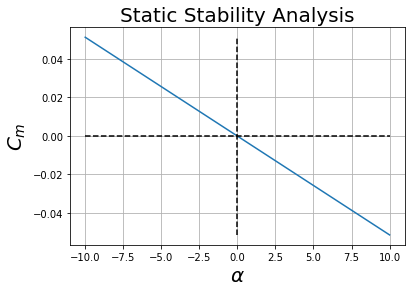

In [6]:
my_plane.static_stability(0, plot_vals=True); # semi-colon supresses return, for this function the trim alpha

As you can see from the plot, this aircraft was designed to trim for steady level flight at 0 angle of attack. The main geometric parameter which controlled this was the incidence angle of the horizontal tail.

In [7]:
my_plane.req_incidence(alpha_target=0)*180/np.pi

-8.124448250389218

Now that we know our aircraft is reasonable stable in terms of immediate pitching tendencies, we need to make sure that the pitching moment can be appropriately controlled by elevator deflection, either to trim at different angles of attack or to climb/descend as necessary.

To check this, stability and control derivatives for the pitching moment were computed and the net pitching moment was plotted as a function of angle of attack for several different elevator deflections. For this aircraft, the elevator was approximately 50% of the tail chord, and the value of elevator effectiveness is how much the effective lift curve slope of the tail changes per radian of elevator deflection. This value was interpolated from analysis in XFLR5.

Warning, trim alpha for delta = -20.0 degrees is above stall angle atalpha = 58.44 degrees
Warning, trim alpha for delta = -15.0 degrees is above stall angle atalpha = 43.83 degrees
Warning, trim alpha for delta = -10.0 degrees is above stall angle atalpha = 29.21 degrees
Warning, negative lift calculated for delta = 5.0 degrees and trim alpha = -14.63 degrees
Warning, negative lift calculated for delta = 10.0 degrees and trim alpha = -29.24 degrees
Warning, negative lift calculated for delta = 15.0 degrees and trim alpha = -43.86 degrees
Warning, negative lift calculated for delta = 20.0 degrees and trim alpha = -58.47 degrees


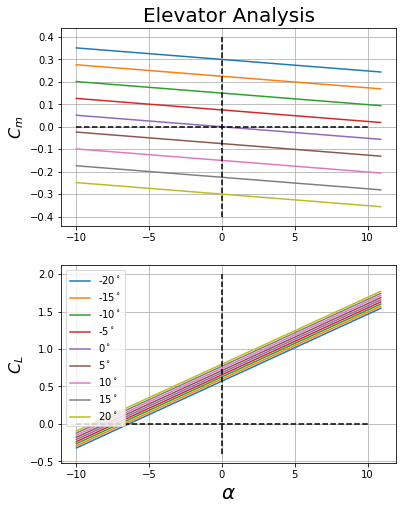

In [8]:
deltas = np.arange(-20, 21, 5) # range of elevator deflections in degrees, from -20 to 20 in intervals of 5
# note in this case a positive is defined as a downwards deflection of the elevator, as downward deflection increase
# camber, thus increasing lift
my_plane.elevator_analysis(deltas, plot_vals=True);

This elevator control is acceptable. It is not too important that the elevator does not directly influence the lift that much. Rather the elevator influences the pitch, which in turn greatly affects the lift by creating a change in angle of attack. This function was also written to warn of the limits of trim conditions for steady level flight. As you can see, the more extreme elevator deflections either push the trim angle of attack past the stall angle (in the highly negative cases) or generate negative lift at trim (in the highly positive case). This kind of analysis can be used to determine the upper and lower bounds on possible cruise velocities using elevator deflection.

Extending stability analysis into the full lateral and longitudinal modes and stability derivatives was somewhat beyond the scope of this project. It was difficult to obtain trustworth values for all of the stability derivatives, as the we did not have sufficient testing equipment at our disposal. However, methods for computing the lateral and longitudinal stability models of an aircraft are included in the Aircraft toolbox, provided the appropriate stability derivatives are passed as arguments.

Another important task in the theoretical analysis of our aircraft was determining the necessary conditions for successful launch. The performance requirements of the competition we entered stipulated the plane be hand-launched with no more than a 5 yard run-up. We had to ensure that we could launch the plane fast enough that the motor would have time to accelerate the plane to cruise speed before hitting the ground or entering an unrecovorable dive. We also had to ensure that the plane did surpass its stall angle of attack.

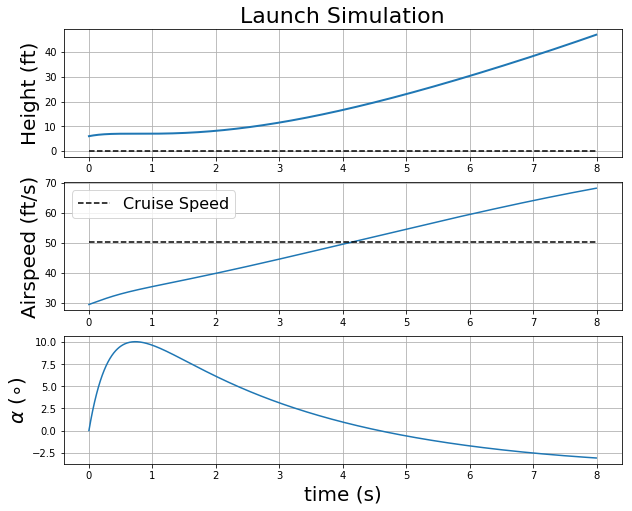

In [9]:
thta0 = 10 * np.pi / 180 # launch angle, 10 degrees converted to radians
V0 = 20 * 5280/3600 # launch speed, 20 mph converted to ft/s, verified feasible in radar-gun tests
h0 = 6 # launch height in feet
my_plane.launch_sim(V0, thta0, h0);

These parameters were sufficient for successful launch, especially considering the weight at which we are conducting our analyses was the theoretical max weight we could load onto our aircraft.